# **Customer-Churn-Predictor**

## 1. Business Understanding

Customer churn is a critical challenge faced by businesses across various industries.<br>In an increasingly competitive market, retaining customers is more cost-effective than acquiring new ones.<br>Therefore, understanding and predicting customer churn has become a strategic priority for businesses aiming to enhance customer retention and maximize revenue.

Customer churn prediction is an essential aspect of business strategy, particularly for companies operating in highly competitive markets. Churn, the phenomenon where customers discontinue their subscription or service, directly impacts revenue and growth potential.<br>By accurately predicting which customers are likely to churn, businesses can implement targeted strategies to retain these customers, thereby enhancing customer loyalty and increasing revenue.

This project aims to develop a predictive model to identify customers at risk of churning. By leveraging historical customer data and advanced machine learning techniques, we will uncover patterns and factors contributing to churn.<br>These insights will guide the development of proactive retention strategies, ensuring the business can mitigate churn effectively.

### 1.1. Hypothesis Testing
**Null Hypothesis (Ho)**: The total amount charged to a customer has no significant influence on wether the customer will churn or not 

**Alternate Hypothesis (Ha)**: The total amount charged to a customer has a significant influence on whether the customer will churn or not.

### 1.2. Analytical Questions
1. Identify which factor is correlated with customer churning
2. Which customer demographics are most likely correlated with churn?
- Explore the relationship between customer demographics; gender, dependants, partners, and senior citizens and the liklihood of customer churning.
3. Which Customers are Likely to Churn?
- Identifying customers at the highest risk of leaving allows for targeted interventions.
4. What Factors Drive Customer Churn?
- Understanding the key drivers behind churn helps in tailoring retention strategies and improving service offerings.
5. How Can We Segment Customers by Churn Risk?
- Segmenting customers based on their likelihood to churn enables personalized marketing and retention strategies.
6. What is the Financial Impact of Reducing Churn?
- Estimating the potential financial benefits of improved retention rates justifies investment in churn prevention initiatives.
7. What is the average revenue per user for customers who churn versus those who do not?

## 2. Data Understanding
Our dataset contains various customer attributes that can help us understand and predict customer churn. Each column represents a different aspect of the customer's profile, service usage, and payment behavior. The columns in our dataset are:

`Feature Description`:
- **customerID**: Unique identifier for each customer.
- **gender**: Customer's gender.
- **SeniorCitizen**: Indicates if the customer is a senior citizen (1) or not (0).
- **Partner**: Indicates if the customer has a partner.
- **Dependents**: Indicates if the customer has dependents.
- **tenure**: Number of months the customer has stayed with the company.
- **PhoneService**: Indicates if the customer has a phone service.
- **MultipleLines**: Indicates if the customer has multiple phone lines.
- **InternetService**: Type of internet service the customer has (e.g., DSL, Fiber optic, None).
- **OnlineSecurity**: Indicates if the customer has online security add-on.
- **OnlineBackup**: Indicates if the customer has online backup add-on.
- **DeviceProtection**: Indicates if the customer has device protection add-on.
- **TechSupport**: Indicates if the customer has tech support add-on.
- **StreamingTV**: Indicates if the customer has streaming TV service.
- **StreamingMovies**: Indicates if the customer has streaming movies service.
- **Contract**: Type of contract the customer has (e.g., month-to-month, one year, two years).
- **PaperlessBilling**: Indicates if the customer uses paperless billing.
- **PaymentMethod**: Method of payment used by the customer (e.g., electronic check, mailed check, bank transfer, credit card).
- **MonthlyCharges**: The amount charged to the customer monthly.
- **TotalCharges**: The total amount charged to the customer.
- **Churn**: Indicates if the customer has churned (Yes) or not (No).

### 2.1. Data Collection

### Import libraries

In [1]:
# Import necessary libraries

# Data manupulation packages
import pandas as pd
import numpy as np

# Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Utility packages
import os
import re
import pyodbc
from dotenv import dotenv_values
import warnings
warnings.filterwarnings("ignore")

### Load Environment Variables and Create SQL Server Connection

In [2]:
# Get the current working directory
current_dir = os.getcwd()
# Construct the path to the .env file located in the 'env_files' directory one level up
dotenv_path = os.path.join(current_dir, '..', 'env_files', '.env')

# Load the .env file
environment_variables = dotenv_values(dotenv_path)
# Access variables from .env file
server = environment_variables.get("SERVER_NAME")
user_name = environment_variables.get("USER_NAME")
password = environment_variables.get("PASSWORD")
database = environment_variables.get("DATABASE_NAME")

In [3]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};UID={user_name};DATABASE={database};PWD={password}"

# Connect to the server using pyodbc
connection = pyodbc.connect(connection_string)

### 2.2. Load Dataset

In [4]:
# Retrieve table from database
sql_querry = "SELECT* FROM dbo.LP2_Telco_churn_first_3000"

# Retrieve dataset from database with connection created
df_first = pd.read_sql(sql_querry, connection)

# Load csv and xlsx files
df_second = pd.read_csv("../data/LP2_Telco-churn-second-2000.csv")
df_third = pd.read_excel("../data/Telco-churn-last-2000.xlsx")

In [5]:
# Preview first dataframe
df_first.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


In [6]:
# Preview second dataframe
df_second.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


### 2.3. Exploratory Data Analysis
#### 2.3.1. Data Quality and Assessment
#### **`First Dataframe`**

In [7]:
# Check characteristics of dataframe
print(f"{df_first.info()}\n{'Null Value Percentage'.center(50, '=')}\n{df_first.isna().mean().mul(100)}\n{'='*50}\nThere are {df_first.duplicated().sum()} duplicated rows present")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [8]:
# Print unique values in each column
for column in df_first.columns:
    print(f"{column}: {df_first[column].unique()}")
    print("="*90)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '1891-FZYSA' '4770-UEZOX'
 '1A1:U3001038-RQOST']
gender: ['Female' 'Male']
SeniorCitizen: [False  True]
Partner: [ True False]
Dependents: [False  True]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [False  True]
MultipleLines: [None False True]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [False True None]
OnlineBackup: [True False None]
DeviceProtection: [False True None]
TechSupport: [False True None]
StreamingTV: [False True None]
StreamingMovies: [False True None]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [ True False]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85000038 56.95000076 53.84999847 ... 33.900001

We replace True and False entries in the first dataframe with Yes and No respectively

In [9]:
# Define the change_bool function
def change_bool(df):
    """
    Returns a DataFrame with True and False entries replaced by Yes and No respectively
    """
    for column in df.columns:
        df[column] = df[column].map(lambda v: "Yes" if v is True else "No" if v is False else v)
    return df

# Apply the change_bool function using pipe
df_first = df_first.pipe(change_bool)
df_first.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes


#### **`Second Dataframe`**

In [10]:
# Check characteristics of dataframe
print(f"{df_second.info()}\n{'Null Value Percentage'.center(50, '=')}\n{df_second.isna().mean().mul(100)}\n{'='*50}\nThere are {df_second.duplicated().sum()} duplicated rows present")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [11]:
# Print unique values of the dataframe
for column in df_second.columns:
    print(f"{column}: {df_second[column].unique()}")
    print("="*90)

customerID: ['5600-PDUJF' '8292-TYSPY' '0567-XRHCU' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Male' 'Female']
SeniorCitizen: [0 1]
Partner: ['No' 'Yes']
Dependents: ['No' 'Yes']
tenure: [ 6 19 69 11 64 39 15 25 66 61 43 12 23 71 34  5 41 72 14  1 10  7  9 48
 20 16  2 22 35 54 56 18 68 53 30 36 55 21 33 44  4 49 42 67 40 45 57  8
 65  3 17 28 52 47 50 46 29 27 13 24 62 26 60 51 70 59 38 37  0 58 31 32
 63]
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'No phone service' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['No' 'Yes' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'Two year' 'One year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Credit card (automatic)' 'Electronic check' 'Mailed check'


filter out non-numeric entries present in the TotalCharges column 

In [12]:
pattern = r'[^0-9.]'
df_second.loc[df_second["TotalCharges"].str.contains(pattern, regex = True)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
1670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [13]:
# Replace all empty entries with NAN and convert datatype to float
df_second["TotalCharges"] = df_second["TotalCharges"].replace(" ", np.NAN).astype(float)

# Replace 0 and 1 in the SeniorCitizen column with No and Yes respectively
df_second["SeniorCitizen"] = df_second["SeniorCitizen"].replace(1, "Yes")
df_second["SeniorCitizen"] = df_second["SeniorCitizen"].replace(0, "No")

# Preview dataframe
df_second.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,No,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,No,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,No,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


Check for standardisation in column names

In [14]:
print(df_first.columns)
print(df_second.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


#### **`Concatenated Dataset`**<br>

Now that data entries of both datasets are consistent and column names are standardised, we then concatenate both dataframes   

In [15]:
# Concatenate the first and second datasets
df_combined = pd.concat([df_first, df_second], axis = 0)
# Reset index
df_combined.reset_index(drop = True, inplace = True)
df_combined.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes


In [16]:
# Check characteristics of dataframe
print(f"{df_combined.info()}\n{'Null Value Percentage'.center(50, '=')}\n{df_combined.isna().mean().mul(100)}\n{'='*50}\nThere are {df_combined.duplicated().sum()} duplicated rows present")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [17]:
for column in df_combined.columns:
    print(f"{column}: {df_combined[column].unique()}")
    print("="*90)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: ['No' 'Yes']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: [None 'No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' None 'No internet service']
OnlineBackup: ['Yes' 'No' None 'No internet service']
DeviceProtection: ['No' 'Yes' None 'No internet service']
TechSupport: ['No' 'Yes' None 'No internet service']
StreamingTV: ['No' 'Yes' None 'No internet service']
StreamingMovies: ['No' 'Yes' None 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check'

In [ ]:
des_stats = df_combined.describe().T.style.background_gradient(cmap = "YlOrRd")
des_stats

#### 2.3.2. Univariate Analysis

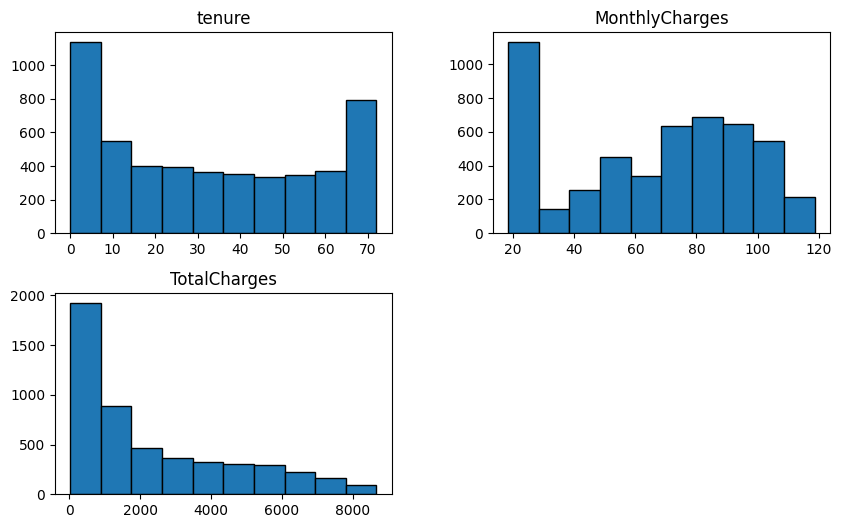

In [19]:
df_combined.hist(figsize = (10, 6), grid = False, edgecolor = "black")
plt.title("Univariate Analysis")
plt.show()

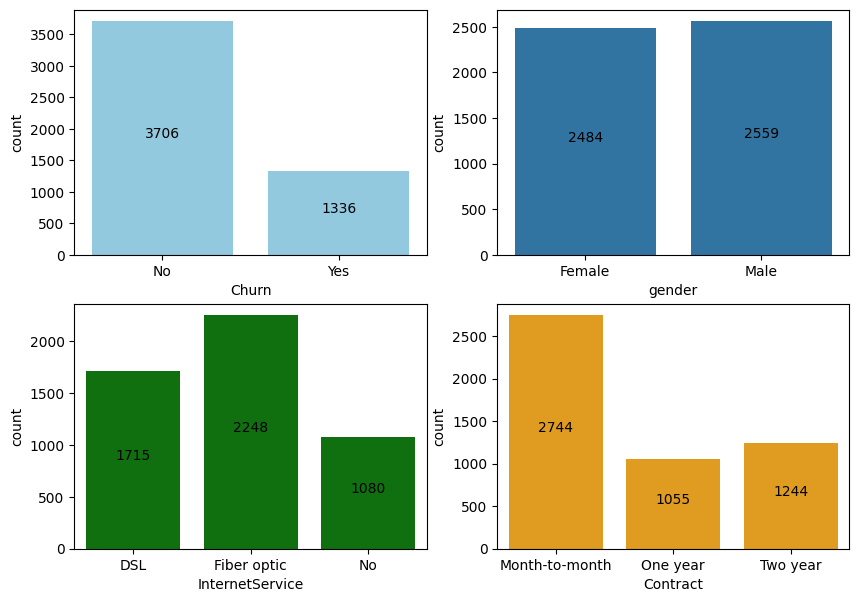

In [20]:
# Set the figure size and create subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 7))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each subplot
sns.countplot(data = df_combined, x = "Churn", ax = axes[0], color = "skyblue")
sns.countplot(data = df_combined, x = "gender", ax = axes[1])
sns.countplot(data = df_combined, x = "InternetService", ax = axes[2], color = "green")
sns.countplot(data = df_combined, x = "Contract", ax = axes[3], color = "orange")

# Annotate each subplot
for ax in axes:
    for bar in ax.patches:
        h = bar.get_height()
        w = bar.get_width()
        x, y = bar.get_xy()
        ax.annotate(f"{int(h)}", (x + w/2, y + h/2), ha = "center")
        
plt.show()

#### 2.3.3. Bi-variate Analysis

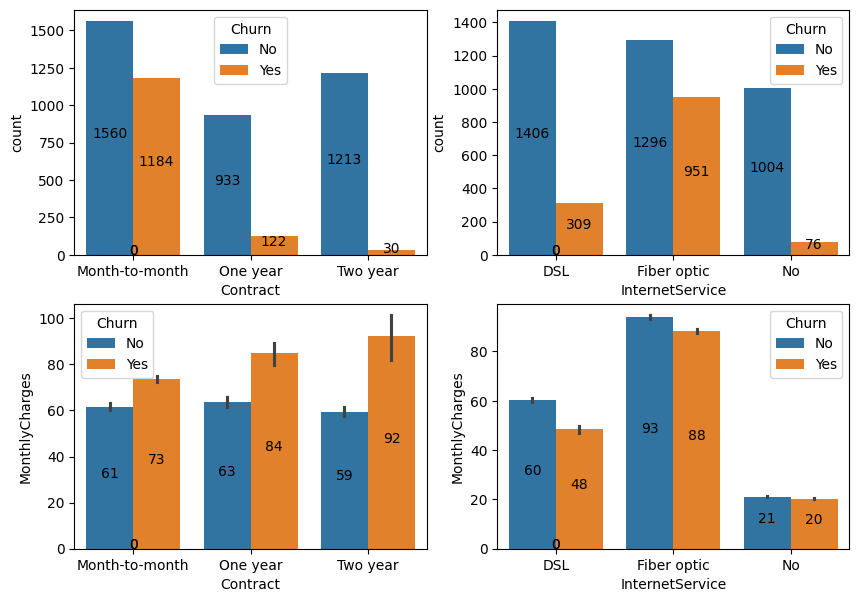

In [21]:
# Set the figure size and create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each subplot
sns.countplot(data=df_combined, x="Contract", hue="Churn", ax=axes[0])
sns.countplot(data=df_combined, x="InternetService", hue="Churn", ax=axes[1])
sns.barplot(data=df_combined, x="Contract", y = "MonthlyCharges", hue="Churn", ax=axes[2])
sns.barplot(data=df_combined, x="InternetService", y = "MonthlyCharges", hue="Churn", ax=axes[3])

# Annotate each subplot
for ax in axes:
    for bar in ax.patches:
        h = bar.get_height()
        w = bar.get_width()
        x, y = bar.get_xy()
        ax.annotate(f"{int(h)}", (x + w/2, y + h/2), ha = "center")

plt.show()

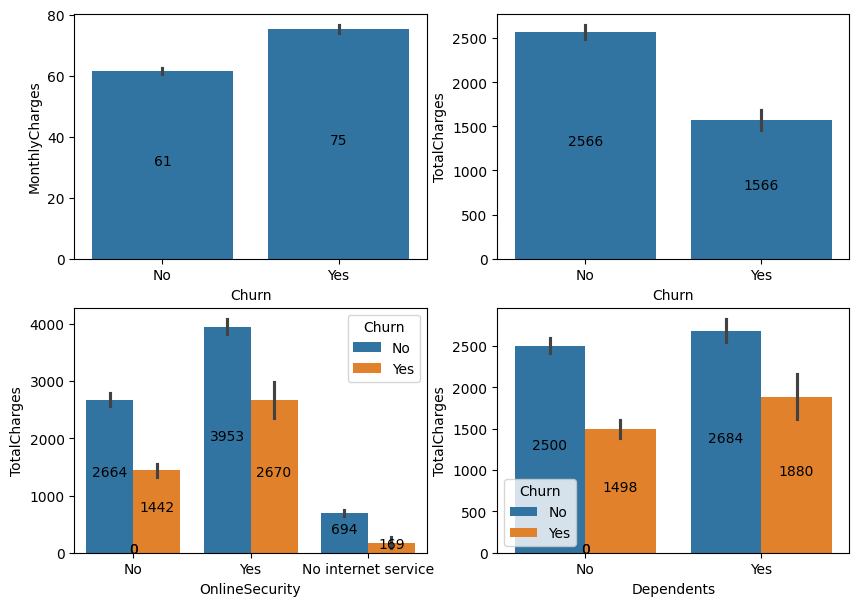

In [22]:
# Set the figure size and create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each subplot
sns.barplot(data=df_combined, x="Churn", y = "MonthlyCharges", ax=axes[0])
sns.barplot(data=df_combined, x="Churn", y = "TotalCharges", ax=axes[1])
sns.barplot(data=df_combined, x="OnlineSecurity", y = "TotalCharges", hue="Churn", ax=axes[2])
sns.barplot(data=df_combined, x="Dependents", y = "TotalCharges", hue="Churn", ax=axes[3])

# Annotate each subplot
for ax in axes:
    for bar in ax.patches:
        h = bar.get_height()
        w = bar.get_width()
        x, y = bar.get_xy()
        ax.annotate(f"{int(h)}", (x + w/2, y + h/2), ha = "center")

plt.show()

#### 2.3.4. Multi-variate Analysis

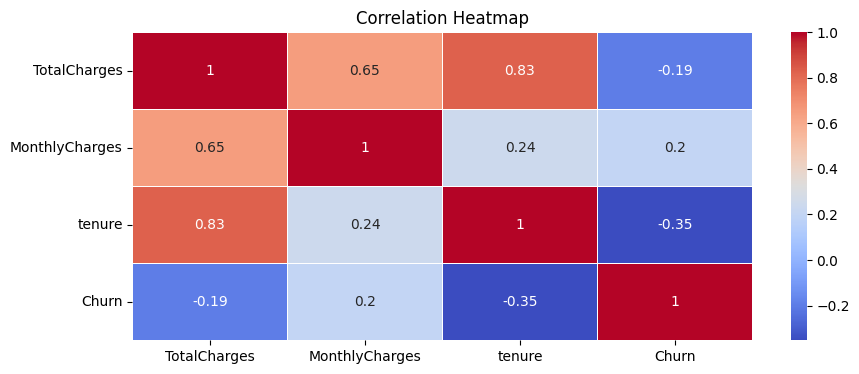

In [23]:
# Extract all yes and no columns
df_filter = df_combined[["TotalCharges", "MonthlyCharges", "tenure", "Churn"]]
# Drop null values
df_filter.dropna(inplace = True)

# Encode categorical values in churn colum
df_filter["Churn"] = df_filter["Churn"].map({"Yes": 1, "No": 0})

# Calculate the correlation coefficients
corr = df_filter.corr()

# Set the figure size and create subplots
plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Duplicate the dataframe;
- We use one dataframe for hypothesis testing and Analysis, and 
- the other dataframe for training and evaluating the model

#### 2.3.5. Hypothesis Testing

#### 2.3.6. Answer Analytical questions with visulizations

### Key Insights
- 